# Cleaning of the Dataset


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mlt
import os
import array as arr
#import matplotlib as mlt
%matplotlib inline

In [ ]:
df = pd.read_csv('EDHB.csv')
df.drop(["Unnamed: 0", "Unnamed: 0.1", "S/No", "atomIDs"], axis=1, inplace=True)
df.head(10)

,Bond,HB length,HB Angle,Intra-HB,Bifurcation type,Donor,Acceptor,pdb,smiles
0,N-H...O,1.8059,164.560,None,0-0-0,ALA,UNL,2fq6,Nc1nc(N)c2c(CSc3ccc(Cl)c(Cl)c3)c[nH]c2n1
1,N-H...O,2.0383,157.310,None,0-0-0,GLY,UNL,2fq6,NC(=S)\N=N\c1c(O)[nH]c2ccc(I)cc12
2,N-H...O,2.2594,146.840,None,0-0-0,SER,UNL,2fq6,[Cl-].C[N+](C)(CCCN1c2ccccc2Sc3ccc(Cl)cc13)Cc4...
3,N-H...N,2.2454,111.530,I(5),0-0-0,UNL,UNL,2fq6,COc1cc(OC)cc(c1)N(C)Cc2c[nH]c3nc(N)nc(O)c23
4,N-H...F,1.9852,92.543,I(7),0-0-1,UNL,UNL,2fq6,COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC
5,N-H...O,2.0767,160.910,None,0-0-0,UNL,GLU,2wmv,Cc1c(CN(C=O)c2ccc(Cl)c(Cl)c2)cnc3nc(N)nc(N)c13
6,N-H...O,1.9601,169.290,None,0-0-0,UNL,GLU,2wmv,Cc1ccc2[nH]c(O)c(\N=N\C(=N)S)c2c1
7,N-H...N,2.0765,176.890,None,0-0-0,CYS,UNL,2wmv,CN(Cc1ccc2nc(N)nc(N)c2n1)c3cccc(Cl)c3
8,N-H...O,2.1522,100.870,I(5),0-0-0,UNL,UNL,2wmv,CCCc1cc(O)c(Oc2ccc(cc2Cl)C#N)c(O)c1
9,O-H...O,1.9150,127.320,I(6),0-0-0,UNL,UNL,3r69,Nc1nc(N)c2CC(Cc3cccs3)CCc2n1


In [ ]:
df.rename(columns={"Bifurcation type": "Bifr"},inplace=True) # just changed some names for my conveniet.
df.rename(columns={"HB length": "HB_length"},inplace=True)
df.rename(columns={"HB Angle": "HB_Angle"},inplace=True)
df.rename(columns={"Intra-HB": "Intra_HB"},inplace=True)
df.drop("pdb", axis=1, inplace=True)

In [ ]:
df

,Bond,HB_length,HB_Angle,Intra_HB,Bifr,Donor,Acceptor,smiles
0,N-H...O,1.8059,164.560,None,0-0-0,ALA,UNL,Nc1nc(N)c2c(CSc3ccc(Cl)c(Cl)c3)c[nH]c2n1
1,N-H...O,2.0383,157.310,None,0-0-0,GLY,UNL,NC(=S)\N=N\c1c(O)[nH]c2ccc(I)cc12
2,N-H...O,2.2594,146.840,None,0-0-0,SER,UNL,[Cl-].C[N+](C)(CCCN1c2ccccc2Sc3ccc(Cl)cc13)Cc4...
3,N-H...N,2.2454,111.530,I(5),0-0-0,UNL,UNL,COc1cc(OC)cc(c1)N(C)Cc2c[nH]c3nc(N)nc(O)c23
4,N-H...F,1.9852,92.543,I(7),0-0-1,UNL,UNL,COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC
...,...,...,...,...,...,...,...,...
21924,N-H...O,2.2950,110.480,None,0-0-0,UNL,ILE,NC(Cc1ccccc1)P(=O)(O)NCC(=O)O
21925,N-H...N,1.8873,144.040,None,0-0-0,ILE,UNL,Cl.CN(C)C1CC(c2ccc(Cl)cc2Cl)c3ccccc13
21926,N-H...O,2.0385,169.720,None,0-0-0,UNL,GLN,SCC(=O)NCCCCCC(=O)Nc1cccc2cccnc12
21927,N-H...O,1.8461,171.300,None,0-0-0,GLN,UNL,Cc1cc(CNC(=O)c2cc(ncn2)C(=O)NCc3ccc(F)c(C)c3)c...


In [ ]:
# I changed the NH-O hydrogen bond type as 1 and others as 0
# then made a new column
def get_HBType(HB):
    if HB == "N-H...O":
        HB_Type = 1
    else:
        HB_Type = 0
    return HB_Type

df["HB_Type"] = df["Bond"].apply(get_HBType) # adding the affinity column to the dataframe
df.drop("Bond", axis=1, inplace=True)
df.head(10)


,HB_length,HB_Angle,Intra_HB,Bifr,Donor,Acceptor,smiles,HB_Type
0,1.8059,164.560,None,0-0-0,ALA,UNL,Nc1nc(N)c2c(CSc3ccc(Cl)c(Cl)c3)c[nH]c2n1,1
1,2.0383,157.310,None,0-0-0,GLY,UNL,NC(=S)\N=N\c1c(O)[nH]c2ccc(I)cc12,1
2,2.2594,146.840,None,0-0-0,SER,UNL,[Cl-].C[N+](C)(CCCN1c2ccccc2Sc3ccc(Cl)cc13)Cc4...,1
3,2.2454,111.530,I(5),0-0-0,UNL,UNL,COc1cc(OC)cc(c1)N(C)Cc2c[nH]c3nc(N)nc(O)c23,0
4,1.9852,92.543,I(7),0-0-1,UNL,UNL,COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC,0
5,2.0767,160.910,None,0-0-0,UNL,GLU,Cc1c(CN(C=O)c2ccc(Cl)c(Cl)c2)cnc3nc(N)nc(N)c13,1
6,1.9601,169.290,None,0-0-0,UNL,GLU,Cc1ccc2[nH]c(O)c(\N=N\C(=N)S)c2c1,1
7,2.0765,176.890,None,0-0-0,CYS,UNL,CN(Cc1ccc2nc(N)nc(N)c2n1)c3cccc(Cl)c3,0
8,2.1522,100.870,I(5),0-0-0,UNL,UNL,CCCc1cc(O)c(Oc2ccc(cc2Cl)C#N)c(O)c1,1
9,1.9150,127.320,I(6),0-0-0,UNL,UNL,Nc1nc(N)c2CC(Cc3cccs3)CCc2n1,0


In [ ]:
!pip install kora -q
import kora.install.rdkit

     |████████████████████████████████| 57 kB 3.0 MB/s 
     |████████████████████████████████| 60 kB 8.0 MB/s 


In [ ]:
from __future__ import print_function

from rdkit import Chem
from rdkit.Chem import MACCSkeys, AllChem
from rdkit.Avalon import pyAvalonTools as fpAvalon
from rdkit.Chem.AtomPairs import Pairs, Torsions
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.ChemicalFeatures import BuildFeatureFactory
from rdkit.Chem import rdMolDescriptors
import pandas as pd
import argparse
import textwrap
import getopt
from argparse import ArgumentParser
import time
from rdkit.Chem import PandasTools

In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
import pandas as pd
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df1 = df.iloc[0:1000]

In [ ]:
df1['molCol'] = df1['smiles'].map(Chem.MolFromSmiles)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1

,HB_length,HB_Angle,Intra_HB,Bifr,Donor,Acceptor,smiles,HB_Type,molCol
0,1.8059,164.560,None,0-0-0,ALA,UNL,Nc1nc(N)c2c(CSc3ccc(Cl)c(Cl)c3)c[nH]c2n1,1,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,2.0383,157.310,None,0-0-0,GLY,UNL,NC(=S)\N=N\c1c(O)[nH]c2ccc(I)cc12,1,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,2.2594,146.840,None,0-0-0,SER,UNL,[Cl-].C[N+](C)(CCCN1c2ccccc2Sc3ccc(Cl)cc13)Cc4...,1,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,2.2454,111.530,I(5),0-0-0,UNL,UNL,COc1cc(OC)cc(c1)N(C)Cc2c[nH]c3nc(N)nc(O)c23,0,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,1.9852,92.543,I(7),0-0-1,UNL,UNL,COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC,0,"<img data-content=""rdkit/molecule"" src=""data:i..."
...,...,...,...,...,...,...,...,...,...
995,1.6516,156.020,None,0-0-0,HIS,UNL,COc1ccc(C(=O)OCc2ccc3nc(N)nc(N)c3c2)c(OC)c1OC,1,"<img data-content=""rdkit/molecule"" src=""data:i..."
996,2.0011,178.180,None,0-0-0,ARG,UNL,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2cn(C)c3ccccc23...,1,"<img data-content=""rdkit/molecule"" src=""data:i..."
997,1.8597,150.520,None,0-0-0,SER,UNL,CN1CCC(CC1)c2cc(c3ccncc3)c([nH]2)c4ccc(cc4)C(F...,1,"<img data-content=""rdkit/molecule"" src=""data:i..."
998,1.8576,150.270,None,0-0-0,ILE,UNL,COc1cc(CCc2cccc3nc(N)nc(N)c23)cc(OC)c1OC,1,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [ ]:
def get_input(mol):
    fp = GetMorganFingerprintAsBitVect(mol, 2, nBits=100) # gets the vector
    arr = np.zeros((0,))
    ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
    return arr

df1["input"] = df1["molCol"].apply(get_input) # adding the input column to the dataframe
#df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
number_arr=[]

for i in range(1000):
    number = i
    number_arr.append(number)

df1['task_indexes'] = number_arr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
import scipy.io as sio

In [ ]:
# changed data to float because yhat will be floats
X = np.array(df1['input'])
y = np.array(df1['HB_Type'])
z = np.array(df1['task_indexes'])
print("We have an input array of shape:", X.shape)
print("We have an output array of shape:", y.shape)

We have an input array of shape: (1000,)
We have an output array of shape: (1000,)


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [ ]:
X.shape

(1000,)

In [ ]:
X = np.concatenate(X)


In [ ]:
X = X.reshape(1000,100)

In [ ]:
X.shape

(1000, 100)

In [ ]:
mat ={}
X = np.array(X)
mat['X'] = X
mat['y'] = y
mat['task_indexes'] = z

In [ ]:
filemat = 'mat1.mat'
sio.savemat(filemat, mat)
raw_data = sio.loadmat('mat1.mat')
X = np.array(raw_data['X'])
y = np.array(raw_data['y'].T)
print("We have an input array of shape:", X.shape)
print("We have an output array of shape:", y.shape)

We have an input array of shape: (1000, 100)
We have an output array of shape: (1000, 1)


In [ ]:
# Matlab - arrays are indexed at 1, needs adapting
start_index = np.ravel(raw_data["task_indexes"])

In [ ]:
from sklearn.utils import Bunch
# save each HB data into a separate dictionary key
# value is a bunch with both feature data and labels
tasks = dict()
for i in range(1000):
    start = start_index[i]
    if i == 999:
        end = -1
    else:
        end = start_index[i + 1]
    descr = "Protein data: protein {}".format(i + 1)
    sid = "protein {}".format(i + 1)
    tasks[sid] = Bunch(data=X[start:end],
                       target=y[start:end],
                       DESCR=descr)
#     if len(tasks.keys())>50:
#         break

In [ ]:
print("Number of targets in dataset:", len(tasks.keys()))

Number of targets in dataset: 1000


In [ ]:
from sklearn.model_selection import train_test_split
# create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.4, random_state=42)

In [ ]:
X_train.shape


(600, 100)

In [ ]:
X_train_all = np.concatenate(X_train)
y_train_all = np.concatenate(y_train)

X_test_all = np.concatenate(X_test)
y_test_all = np.concatenate(y_test)

# General MOdel

In [ ]:
generalized_mlp = Sequential()
generalized_mlp.add(Dense(input_dim=X_train.shape[1], units=32, activation='relu', name='input_dense32'))
generalized_mlp.add(Dense(units=16, activation='relu', name='mid_dense16'))
generalized_mlp.add(Dense(1, activation='linear', name='output_layer'))

generalized_mlp.compile(loss='mean_squared_error',
            optimizer='rmsprop',
            metrics=[])

generalized_mlp.fit(X_train, y_train, epochs=20,
                    shuffle=True, verbose=1, validation_data=(X_test,y_test))
y_hat_general = generalized_mlp.predict(X_test)

Epoch 1/20
19/19 [==============================] - 3s 11ms/step - loss: 0.3053 - val_loss: 0.2562
Epoch 2/20
19/19 [==============================] - 0s 5ms/step - loss: 0.2521 - val_loss: 0.2562
Epoch 3/20
19/19 [==============================] - 0s 6ms/step - loss: 0.2290 - val_loss: 0.2528
Epoch 4/20
19/19 [==============================] - 0s 4ms/step - loss: 0.2105 - val_loss: 0.2479
Epoch 5/20
19/19 [==============================] - 0s 4ms/step - loss: 0.1950 - val_loss: 0.2516
Epoch 6/20
19/19 [==============================] - 0s 4ms/step - loss: 0.1852 - val_loss: 0.2555
Epoch 7/20
19/19 [==============================] - 0s 5ms/step - loss: 0.1740 - val_loss: 0.2559
Epoch 8/20
19/19 [==============================] - 0s 4ms/step - loss: 0.1637 - val_loss: 0.2554
Epoch 9/20
19/19 [==============================] - 0s 4ms/step - loss: 0.1547 - val_loss: 0.2584
Epoch 10/20
19/19 [==============================] - 0s 4ms/step - loss: 0.1468 - val_loss: 0.2593
Epoch 11/20
19/19 

# General Model Evaluation

In [ ]:
y_predicted = y_hat_general
y_true = y_test

In [ ]:
y_predicted_cor1 = []
for i in range (len(y_true)):
    if y_predicted[i] < 0.5:
        i = 0
    else:
        i = 1
    y_predicted_cor1.append(i)

In [ ]:
active = []
inactive = []

for i in range (len(y_true)):
    if y_predicted_cor1[i] == 0:
        inactive.append(i)
    else:
        active.append(i)
print('number of non NH-O type HBs  from 400000 ligands = ', len(inactive))
print('number of  NH-O type HBs  from 400000 ligands = ', len(active))

number of non NH-O type HBs  from 400000 ligands =  114
number of  NH-O type HBs  from 400000 ligands =  286


In [ ]:
numActives = 337
numDecoys = 63
numMol = numActives + numDecoys
act = [[1] for _ in range(0, numActives)]
dcy = [[0] for _ in range(0, numDecoys)]
scoreBestCase = act + dcy
scoreWorstCase = dcy + act
scoreAllActives = [[1] for _ in range(0, numMol)]
scoreAllDecoys = [[0] for _ in range(0, numMol)]
index = 0  # where the active/inactive information lies
# test the 6.75% fraction
fractions = [float((numActives)/10) / numMol]
#fracSmall = [fractions[0] / 4000]
# exponential weight
alpha = 80.0

In [ ]:
import rdkit.ML.Scoring.Scoring as calc

In [ ]:
print('The best AUC value of the model = ',calc.CalcAUC(scoreBestCase, index))
print('The worst AUC value of the model = ',calc.CalcAUC(scoreWorstCase, index))
print('The AUC value when all are active = ',calc.CalcAUC(scoreAllActives, index))
print('The AUC value when all are inactive = ',calc.CalcAUC(scoreAllDecoys, index))

The best AUC value of the model =  1.0
The worst AUC value of the model =  0.0
The AUC value when all are active =  0.0
The AUC value when all are inactive =  0.0


In [ ]:
print('The best enrich factor 6.75% value of the model = ',calc.CalcEnrichment(scoreBestCase, index, fractions))
print('The worst enrich factor 6.75% value of the model = ',calc.CalcEnrichment(scoreWorstCase, index, fractions))
print('The enrich factor value 6.75% when all are active = ',calc.CalcEnrichment(scoreAllActives, index, fractions))
print('The enrich factor value 6.75% when all are inactive = ',calc.CalcEnrichment(scoreAllDecoys, index, fractions))

The best enrich factor 6.75% value of the model =  [1.1869436201780414]
The worst enrich factor 6.75% value of the model =  [0.0]
The enrich factor value 6.75% when all are active =  [1.0]
The enrich factor value 6.75% when all are inactive =  [0.0]


In [ ]:
print('The best Bed roc 80 value of the model = ',calc.CalcBEDROC(scoreBestCase, index, alpha))
print('The worst Bed roc 80 value of the model = ',calc.CalcBEDROC(scoreWorstCase, index, alpha))
print('The Bed roc value 80 when all are active = ',calc.CalcBEDROC(scoreAllActives, index, alpha))
print('The Bed roc value 80 when all are inactive = ',calc.CalcBEDROC(scoreAllDecoys, index, alpha))

The best Bed roc 80 value of the model =  1.0
The worst Bed roc 80 value of the model =  -2.2122457597178227e-20
The Bed roc value 80 when all are active =  1.0
The Bed roc value 80 when all are inactive =  0.0


In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import precision_score, mean_squared_log_error

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.figure(figsize=(15,10))
    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.title("Bland Altman, MSE: "+str(mean_squared_error(data1,data2)))
    plt.xlabel('Mean Score', fontsize=8)
    plt.ylabel('Diff Score', fontsize=8)
    plt.show()

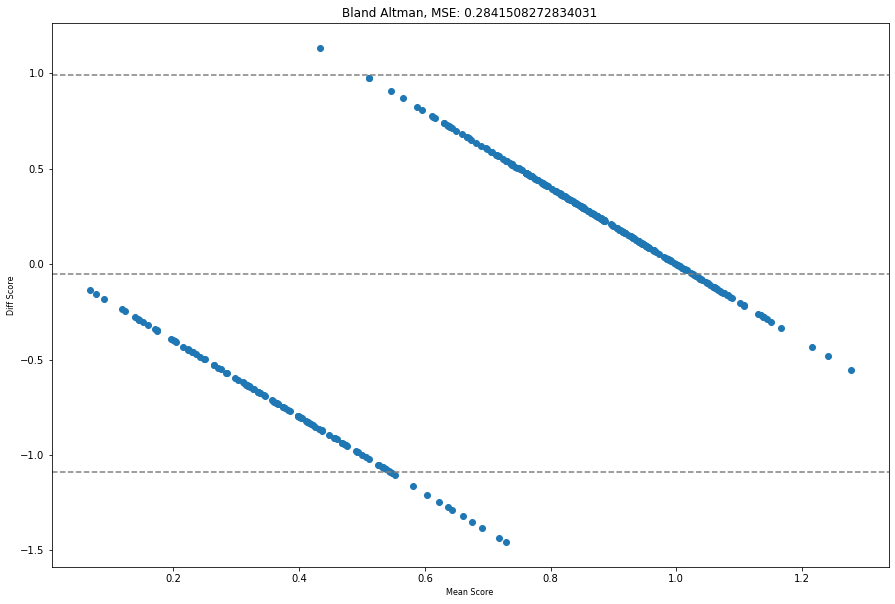

In [ ]:
bland_altman_plot(y_test, y_predicted)

#  MUlti-Task Model



In [ ]:
%%time
EPOCHS = 20
from random import shuffle

all_keys = list(tasks.keys())

for i in range(EPOCHS):
    print('Epoch',i,end=', ')
    shuffle(all_keys) # shuffle in place operation
    y_mtl=[]
    yhat_mtl=[]
    for x in all_keys:
        # train the personalized layers ONLY
        # no need to worry about fitting too much to one school
        # because shared layers are not updated
        models_mtl[x].fit(X_train,y_train,
                          verbose=0,
                          epochs=1,
                          shuffle=True)
        # test on some data
        yhat_mlp = models_mtl[x].predict(X_test)
        y_mtl.append(y_test.ravel())
        yhat_mtl.append(yhat_mlp.ravel())

    mse = mean_squared_error(np.concatenate(y_mtl), np.concatenate(yhat_mtl))
    print('...MSE Validation:',mse)

Epoch 0, ...MSE Validation: 0.26360728511614984
Epoch 1, ...MSE Validation: 0.2644194205858836
Epoch 2, ...MSE Validation: 0.2652063685021589
Epoch 3, ...MSE Validation: 0.26598107018785266
Epoch 4, ...MSE Validation: 0.266756203395143
Epoch 5, ...MSE Validation: 0.2675398030561537
Epoch 6, ...MSE Validation: 0.2683132936506782
Epoch 7, ...MSE Validation: 0.26908546665714295
Epoch 8, ...MSE Validation: 0.269845111305073
Epoch 9, ...MSE Validation: 0.27060178247656924
Epoch 10, ...MSE Validation: 0.2713381209063395
Epoch 11, ...MSE Validation: 0.27205315712923916
Epoch 12, ...MSE Validation: 0.2727533815968115
Epoch 13, ...MSE Validation: 0.2734423877270106
Epoch 14, ...MSE Validation: 0.2741181096217427
Epoch 15, ...MSE Validation: 0.2747702949326748
Epoch 16, ...MSE Validation: 0.27541237074931824
Epoch 17, ...MSE Validation: 0.27603235838817064
Epoch 18, ...MSE Validation: 0.2766381466837916
Epoch 19, ...MSE Validation: 0.2772227979469039
CPU times: user 56min 25s, sys: 3min 2s, tota

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

#get weights of generalized model
w1 = generalized_mlp.get_layer('input_dense32').get_weights()
w2 = generalized_mlp.get_layer('mid_dense16').get_weights()
w_output = generalized_mlp.get_layer('output_layer').get_weights()

# set these weights
inputs = Input(shape=(X_train.shape[1],))
shared_input = Dense(32, activation='relu', name = 'shared_input', trainable=False)(inputs)
shared_mlp = Dense(16, activation='relu', name = 'shared_middle', trainable=False)(shared_input)

# make a dictionary of models for each task
models_mtl = dict()

for x in tasks.keys():
    # use same architecture as the general model, but
    #. repeat the output layer such that
    output_layer = Dense(1, activation='linear')(shared_mlp)
    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    models_mtl[x] = model

    shared1 = models_mtl[x].get_layer('shared_input')
    shared2 = models_mtl[x].get_layer('shared_middle')
    personal = models_mtl[x].layers[-1]
    # set to be the weights from the general model, as starting point
    shared1.set_weights(w1)
    shared2.set_weights(w2)
    personal.set_weights(w_output)
    shared1.trainable = False
    shared2.trainable = False
    personal.trainable = True

In [ ]:
from sklearn.metrics import mean_squared_error

# Multi-Task evaluation

In [ ]:
y_true = np.concatenate(y_mtl)
y_predicted = np.concatenate(yhat_mtl)
#y_predicted.shape

In [ ]:
y_predicted_cor = []
for i in range (len(y_true)):
    if y_predicted[i] < 0.3:
        i = 0
    elif y_predicted[i] > 0.7:
         i = 1
    else:
        i = 2
    y_predicted_cor.append(i)


In [ ]:
len(y_predicted_cor)

400000

In [ ]:
zero = []
one = []
two = []

for i in range (len(y_true)):
    if y_predicted_cor[i] == 0:
        zero.append(i)
    elif y_predicted_cor[i] == 1:
        one.append(i)
    else:
        two.append(i)
print('number of NH-O type HBs  from 400000 ligands = ', len(zero))
print('number of non NH-O type HBs  from 400000 ligands = ', len(one))
print('number of ligands cannot evaluate (between 0.7 - 0.3) = ', len(two))


number of NH-O type HBs  from 400000 ligands =  42875
number of non NH-O type HBs  from 400000 ligands =  184812
number of ligands cannot evaluate (between 0.7 - 0.3) =  172313


In [ ]:
y_predicted_cor1 = []
for i in range (len(y_true)):
    if y_predicted[i] < 0.5:
        i = 0
    else:
        i = 1
    y_predicted_cor1.append(i)

In [ ]:
active = []
inactive = []

for i in range (len(y_true)):
    if y_predicted_cor1[i] == 0:
        inactive.append(i)
    else:
        active.append(i)
print('number of non NH-O type HBs  from 400000 ligands = ', len(inactive))
print('number of  NH-O type HBs  from 400000 ligands = ', len(active))



number of non NH-O type HBs  from 400000 ligands =  111529
number of  NH-O type HBs  from 400000 ligands =  288471


In [ ]:
numActives = 275569
numDecoys = 124431
numMol = numActives + numDecoys
act = [[1] for _ in range(0, numActives)]
dcy = [[0] for _ in range(0, numDecoys)]
scoreBestCase = act + dcy
scoreWorstCase = dcy + act
scoreAllActives = [[1] for _ in range(0, numMol)]
scoreAllDecoys = [[0] for _ in range(0, numMol)]
index = 0  # where the active/inactive information lies
# test the 6.75% fraction
fractions = [float((numActives)/10) / numMol]
#fracSmall = [fractions[0] / 4000]
# exponential weight
alpha = 200.0

In [ ]:
import rdkit.ML.Scoring.Scoring as calc

In [ ]:
print('The best AUC value of the model = ',calc.CalcAUC(scoreBestCase, index))
print('The worst AUC value of the model = ',calc.CalcAUC(scoreWorstCase, index))
print('The AUC value when all are active = ',calc.CalcAUC(scoreAllActives, index))
print('The AUC value when all are inactive = ',calc.CalcAUC(scoreAllDecoys, index))

The best AUC value of the model =  1.0
The worst AUC value of the model =  0.0
The AUC value when all are active =  0.0
The AUC value when all are inactive =  0.0


In [ ]:
print('The best enrich factor 6.75% value of the model = ',calc.CalcEnrichment(scoreBestCase, index, fractions))
print('The worst enrich factor 6.75% value of the model = ',calc.CalcEnrichment(scoreWorstCase, index, fractions))
print('The enrich factor value 6.75% when all are active = ',calc.CalcEnrichment(scoreAllActives, index, fractions))
print('The enrich factor value 6.75% when all are inactive = ',calc.CalcEnrichment(scoreAllDecoys, index, fractions))

The best enrich factor 6.75% value of the model =  [1.4515420820193854]
The worst enrich factor 6.75% value of the model =  [0.0]
The enrich factor value 6.75% when all are active =  [1.0]
The enrich factor value 6.75% when all are inactive =  [0.0]


In [ ]:
print('The best Bed roc 200 value of the model = ',calc.CalcBEDROC(scoreBestCase, index, alpha))
print('The worst Bed roc 200 value of the model = ',calc.CalcBEDROC(scoreWorstCase, index, alpha))
print('The Bed roc value 200 when all are active = ',calc.CalcBEDROC(scoreAllActives, index, alpha))
print('The Bed roc value 200 when all are inactive = ',calc.CalcBEDROC(scoreAllDecoys, index, alpha))

The best Bed roc 200 value of the model =  0.9999999999997393
The worst Bed roc 200 value of the model =  -3.0015010486918766e-40
The Bed roc value 200 when all are active =  1.0
The Bed roc value 200 when all are inactive =  0.0


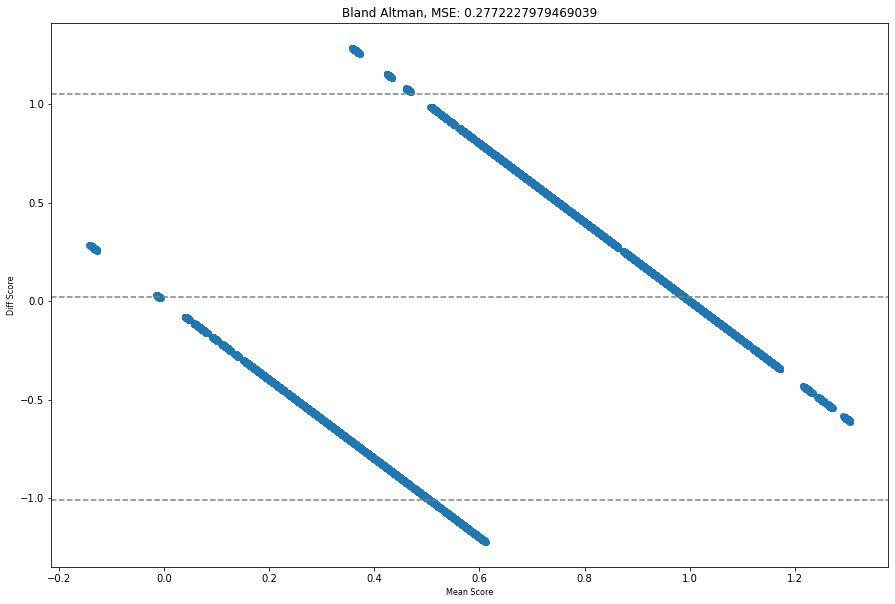

In [ ]:
bland_altman_plot(np.concatenate(y_mtl),
                  np.concatenate(yhat_mtl) )



# Fine tune with sigmoid and dropouts - general model



In [ ]:
generalized_mlp = Sequential()
generalized_mlp.add(Dense(input_dim=X_train.shape[1], units=32, activation='relu', name='input_dense32'))
generalized_mlp.add(Dropout(0.2))
generalized_mlp.add(Dense(units=16, activation='relu', name='mid_dense16'))
generalized_mlp.add(Dropout(0.2))
generalized_mlp.add(Dense(1, activation='sigmoid', name='output_layer'))

generalized_mlp.compile(loss='mean_squared_error',
            optimizer='rmsprop',
            metrics=[])

generalized_mlp.fit(X_train, y_train, epochs=20,
                    shuffle=True, verbose=1, validation_data=(X_test,y_test))
y_hat_general = generalized_mlp.predict(X_test)

Epoch 1/20
19/19 [==============================] - 1s 9ms/step - loss: 0.2366 - val_loss: 0.2146
Epoch 2/20
19/19 [==============================] - 0s 4ms/step - loss: 0.2258 - val_loss: 0.2132
Epoch 3/20
19/19 [==============================] - 0s 4ms/step - loss: 0.2253 - val_loss: 0.2142
Epoch 4/20
19/19 [==============================] - 0s 4ms/step - loss: 0.2182 - val_loss: 0.2133
Epoch 5/20
19/19 [==============================] - 0s 4ms/step - loss: 0.2209 - val_loss: 0.2127
Epoch 6/20
19/19 [==============================] - 0s 4ms/step - loss: 0.2126 - val_loss: 0.2132
Epoch 7/20
19/19 [==============================] - 0s 5ms/step - loss: 0.2099 - val_loss: 0.2137
Epoch 8/20
19/19 [==============================] - 0s 5ms/step - loss: 0.2160 - val_loss: 0.2133
Epoch 9/20
19/19 [==============================] - 0s 4ms/step - loss: 0.2123 - val_loss: 0.2145
Epoch 10/20
19/19 [==============================] - 0s 5ms/step - loss: 0.2100 - val_loss: 0.2147
Epoch 11/20
19/19 [

In [ ]:
y_predicted = y_hat_general
y_true = y_test

In [ ]:
y_predicted_cor1 = []
for i in range (len(y_true)):
    if y_predicted[i] < 0.5:
        i = 0
    else:
        i = 1
    y_predicted_cor1.append(i)

In [ ]:
active = []
inactive = []

for i in range (len(y_true)):
    if y_predicted_cor1[i] == 0:
        inactive.append(i)
    else:
        active.append(i)
print('number of non NH-O type HBs  from 400000 ligands = ', len(inactive))
print('number of  NH-O type HBs  from 400000 ligands = ', len(active))

number of non NH-O type HBs  from 400000 ligands =  25
number of  NH-O type HBs  from 400000 ligands =  375


In [ ]:
numActives = 375
numDecoys = 25
numMol = numActives + numDecoys
act = [[1] for _ in range(0, numActives)]
dcy = [[0] for _ in range(0, numDecoys)]
scoreBestCase = act + dcy
scoreWorstCase = dcy + act
scoreAllActives = [[1] for _ in range(0, numMol)]
scoreAllDecoys = [[0] for _ in range(0, numMol)]
index = 0  # where the active/inactive information lies
# test the 6.75% fraction
fractions = [float((numActives)/10) / numMol]
#fracSmall = [fractions[0] / 4000]
# exponential weight
alpha = 80.0

In [ ]:
print('The best AUC value of the model = ',calc.CalcAUC(scoreBestCase, index))
print('The worst AUC value of the model = ',calc.CalcAUC(scoreWorstCase, index))
print('The AUC value when all are active = ',calc.CalcAUC(scoreAllActives, index))
print('The AUC value when all are inactive = ',calc.CalcAUC(scoreAllDecoys, index))

The best AUC value of the model =  1.0
The worst AUC value of the model =  0.0
The AUC value when all are active =  0.0
The AUC value when all are inactive =  0.0


In [ ]:
print('The best enrich factor 6.75% value of the model = ',calc.CalcEnrichment(scoreBestCase, index, fractions))
print('The worst enrich factor 6.75% value of the model = ',calc.CalcEnrichment(scoreWorstCase, index, fractions))
print('The enrich factor value 6.75% when all are active = ',calc.CalcEnrichment(scoreAllActives, index, fractions))
print('The enrich factor value 6.75% when all are inactive = ',calc.CalcEnrichment(scoreAllDecoys, index, fractions))

The best enrich factor 6.75% value of the model =  [1.0666666666666667]
The worst enrich factor 6.75% value of the model =  [0.36491228070175435]
The enrich factor value 6.75% when all are active =  [1.0]
The enrich factor value 6.75% when all are inactive =  [0.0]


In [ ]:
print('The best Bed roc 200 value of the model = ',calc.CalcBEDROC(scoreBestCase, index, alpha))
print('The worst Bed roc 200 value of the model = ',calc.CalcBEDROC(scoreWorstCase, index, alpha))
print('The Bed roc value 200 when all are active = ',calc.CalcBEDROC(scoreAllActives, index, alpha))
print('The Bed roc value 200 when all are inactive = ',calc.CalcBEDROC(scoreAllDecoys, index, alpha))

The best Bed roc 200 value of the model =  0.9999999999999998
The worst Bed roc 200 value of the model =  -4.9120066164254015e-18
The Bed roc value 200 when all are active =  1.0
The Bed roc value 200 when all are inactive =  0.0


# Fine tune with sigmoid and dropouts - multi task model

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

#get weights of generalized model
w1 = generalized_mlp.get_layer('input_dense32').get_weights()
w2 = generalized_mlp.get_layer('mid_dense16').get_weights()
w_output = generalized_mlp.get_layer('output_layer').get_weights()

# set these weights
inputs = Input(shape=(X_train.shape[1],))
shared_input = Dense(32, activation='relu', name = 'shared_input', trainable=False)(inputs)
shared_mlp = Dense(16, activation='relu', name = 'shared_middle', trainable=False)(shared_input)

# make a dictionary of models for each task
models_mtl = dict()

for x in tasks.keys():
    # use same architecture as the general model, but
    #. repeat the output layer such that
    output_layer = Dense(1, activation='sigmoid')(shared_mlp)
    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    models_mtl[x] = model

    shared1 = models_mtl[x].get_layer('shared_input')
    shared2 = models_mtl[x].get_layer('shared_middle')
    personal = models_mtl[x].layers[-1]
    # set to be the weights from the general model, as starting point
    shared1.set_weights(w1)
    shared2.set_weights(w2)
    personal.set_weights(w_output)
    shared1.trainable = False
    shared2.trainable = False
    personal.trainable = True

In [ ]:
%%time
EPOCHS = 20
from random import shuffle

all_keys = list(tasks.keys())

for i in range(EPOCHS):
    print('Epoch',i,end=', ')
    shuffle(all_keys) # shuffle in place operation
    y_mtl=[]
    yhat_mtl=[]
    for x in all_keys:
        # train the personalized layers ONLY
        # no need to worry about fitting too much to one school
        # because shared layers are not updated
        models_mtl[x].fit(X_train,y_train,
                          verbose=0,
                          epochs=1,
                          shuffle=True)
        # test on some data
        yhat_mlp = models_mtl[x].predict(X_test)
        y_mtl.append(y_test.ravel())
        yhat_mtl.append(yhat_mlp.ravel())

    mse = mean_squared_error(np.concatenate(y_mtl), np.concatenate(yhat_mtl))
    print('...MSE Validation:',mse)

Epoch 0, ...MSE Validation: 0.22227783692160216
Epoch 1, ...MSE Validation: 0.22255578280401286
Epoch 2, ...MSE Validation: 0.22286258633396644
Epoch 3, ...MSE Validation: 0.2231953438918911
Epoch 4, ...MSE Validation: 0.223550013700775
Epoch 5, ...MSE Validation: 0.22391890349736182
Epoch 6, ...MSE Validation: 0.22429867745015247
Epoch 7, ...MSE Validation: 0.22468685345507022
Epoch 8, ...MSE Validation: 0.2250802560217785
Epoch 9, ...MSE Validation: 0.2254816020895223
Epoch 10, ...MSE Validation: 0.2258841089149858
Epoch 11, ...MSE Validation: 0.226290117894464
Epoch 12, ...MSE Validation: 0.22669722410672424
Epoch 13, ...MSE Validation: 0.2271026824775738
Epoch 14, ...MSE Validation: 0.22751048463262913
Epoch 15, ...MSE Validation: 0.22791580072941645
Epoch 16, ...MSE Validation: 0.228319535422052
Epoch 17, ...MSE Validation: 0.22872311124460523
Epoch 18, ...MSE Validation: 0.22912390668930252
Epoch 19, ...MSE Validation: 0.2295240981308299
CPU times: user 56min, sys: 3min 3s, total

In [ ]:
y_true = np.concatenate(y_mtl)
y_predicted = np.concatenate(yhat_mtl)
#y_predicted.shape

In [ ]:
y_predicted_cor1 = []
for i in range (len(y_true)):
    if y_predicted[i] < 0.5:
        i = 0
    else:
        i = 1
    y_predicted_cor1.append(i)

In [ ]:
active = []
inactive = []

for i in range (len(y_true)):
    if y_predicted_cor1[i] == 0:
        inactive.append(i)
    else:
        active.append(i)
print('number of non NH-O type HBs  from 400000 ligands = ', len(inactive))
print('number of  NH-O type HBs  from 400000 ligands = ', len(active))



number of non NH-O type HBs  from 400000 ligands =  47548
number of  NH-O type HBs  from 400000 ligands =  352452


In [ ]:
numActives = 352452
numDecoys = 47548
numMol = numActives + numDecoys
act = [[1] for _ in range(0, numActives)]
dcy = [[0] for _ in range(0, numDecoys)]
scoreBestCase = act + dcy
scoreWorstCase = dcy + act
scoreAllActives = [[1] for _ in range(0, numMol)]
scoreAllDecoys = [[0] for _ in range(0, numMol)]
index = 0  # where the active/inactive information lies
# test the 6.75% fraction
fractions = [float((numActives)/10) / numMol]
#fracSmall = [fractions[0] / 4000]
# exponential weight
alpha = 200.0

In [ ]:
print('The best AUC value of the model = ',calc.CalcAUC(scoreBestCase, index))
print('The worst AUC value of the model = ',calc.CalcAUC(scoreWorstCase, index))
print('The AUC value when all are active = ',calc.CalcAUC(scoreAllActives, index))
print('The AUC value when all are inactive = ',calc.CalcAUC(scoreAllDecoys, index))

The best AUC value of the model =  1.0
The worst AUC value of the model =  0.0
The AUC value when all are active =  0.0
The AUC value when all are inactive =  0.0


In [ ]:
print('The best enrich factor 6.75% value of the model = ',calc.CalcEnrichment(scoreBestCase, index, fractions))
print('The worst enrich factor 6.75% value of the model = ',calc.CalcEnrichment(scoreWorstCase, index, fractions))
print('The enrich factor value 6.75% when all are active = ',calc.CalcEnrichment(scoreAllActives, index, fractions))
print('The enrich factor value 6.75% when all are inactive = ',calc.CalcEnrichment(scoreAllDecoys, index, fractions))

The best enrich factor 6.75% value of the model =  [1.134906313483822]
The worst enrich factor 6.75% value of the model =  [0.0]
The enrich factor value 6.75% when all are active =  [1.0]
The enrich factor value 6.75% when all are inactive =  [0.0]


In [ ]:
print('The best Bed roc 200 value of the model = ',calc.CalcBEDROC(scoreBestCase, index, alpha))
print('The worst Bed roc 200 value of the model = ',calc.CalcBEDROC(scoreWorstCase, index, alpha))
print('The Bed roc value 200 when all are active = ',calc.CalcBEDROC(scoreAllActives, index, alpha))
print('The Bed roc value 200 when all are inactive = ',calc.CalcBEDROC(scoreAllDecoys, index, alpha))

The best Bed roc 200 value of the model =  0.9999999999997392
The worst Bed roc 200 value of the model =  -1.251008965642056e-23
The Bed roc value 200 when all are active =  1.0
The Bed roc value 200 when all are inactive =  0.0


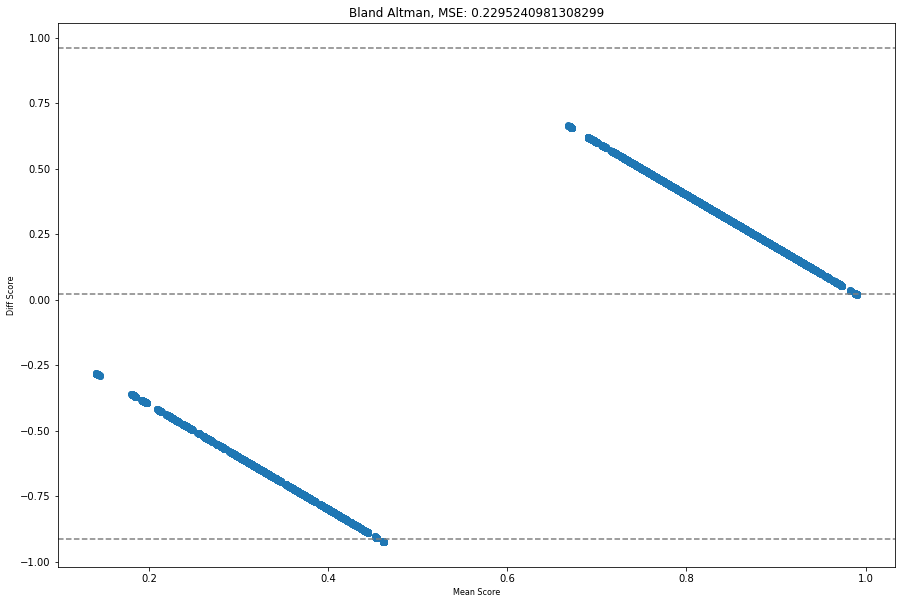

In [ ]:
bland_altman_plot(np.concatenate(y_mtl),
                  np.concatenate(yhat_mtl) )